## Notebook del capítulo 5

In [1]:
# 22/5/24
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 1

In [2]:
# Datos
xn= np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])
yn= np.array([1.00, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])

Text(0, 0.5, '$v$ [m/s]')

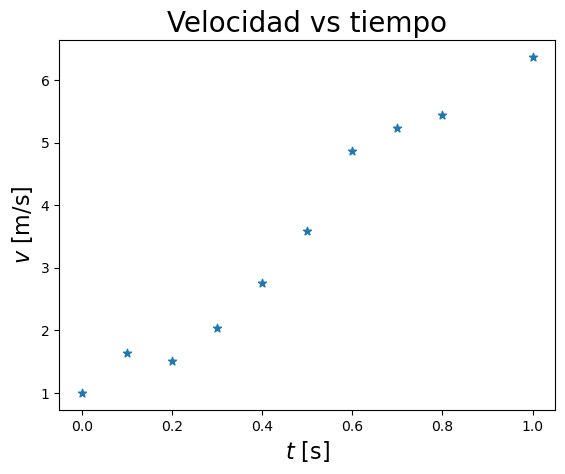

In [3]:
plt.scatter(xn, yn, marker='*') 
plt.title(r'Velocidad vs tiempo', fontsize=20) 
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)

In [4]:
# Se obtiene el valor de n (numero de datos)
n = len(xn)
# Las sumatorias necesarias 
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Sum_xSumy = np.sum(xn)*np.sum(yn)
Delta = n*np.sum(xn**2) - (np.sum(xn))**2
print(n,',', Sum_x, ',',Sum_y,',', Sum_xx,',', Sum_xy,',', Sum_xSumy, ',',Delta)

10 , 4.6 , 34.43 , 3.04 , 21.275 , 158.378 , 9.240000000000002


In [5]:
# Se escriben las ecuaciones para b y m 
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta
b_mc = Sum_y /n - m_mc * Sum_x/n
print('m=',m_mc, ',', 'b=',b_mc)

m= 5.884415584415585 , b= 0.7361688311688313


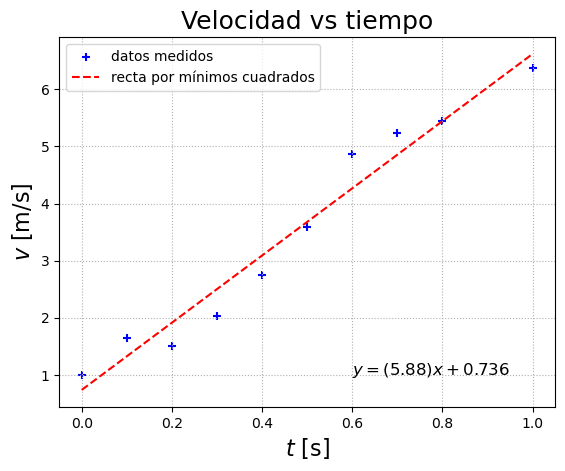

In [6]:
# La gráfica con los datos y la recta que mejor se ajusta 
y_pred= m_mc*xn + b_mc
# 
plt.figure()
plt.scatter(xn, yn, color='b',marker='+', label='datos medidos')
plt.plot(xn, y_pred, 'r--',label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title(r'Velocidad vs tiempo', fontsize=18)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.text(0.6, 1.0, '$y=(5.88) x + 0.736$', fontsize=12)
plt.show()

In [7]:
SSE= np.sum((yn -(b_mc + m_mc*xn))**2)
Sy= np.sqrt(SSE/(n-2))
print('n=',n,',','SSE=', SSE ,',', 'Sy=',Sy)

n= 10 , SSE= 1.244265584415585 , Sy= 0.3943769745458628


In [8]:
Delta_m = np.sqrt(n/(n*np.sum(xn ** 2) - np.sum(xn)**2))*Sy
Delta_b = np.sqrt(np.sum(xn**2)/(n*np.sum(xn**2)-np.sum(xn)**2))*Sy
print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Delta_m, 1)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Delta_b, 1)}')

m = 5.9 ± 0.4
b = 0.7 ± 0.2


In [9]:
# Ajustar la recta por mínimos cuadrados usando linalg.lstsq
A = np.vstack([xn, np.ones(len(xn))]).T
m_c, b_c = np.linalg.lstsq(A, yn, rcond=None)[0]
print(f'm = {np.round(m_c, 1)}' )
print(f'b = {np.round(b_c, 1)}' )

m = 5.9
b = 0.7


In [10]:
import statsmodels.api as sm

m = 5.8844 ± 0.4103
b = 0.7362 ± 0.2262


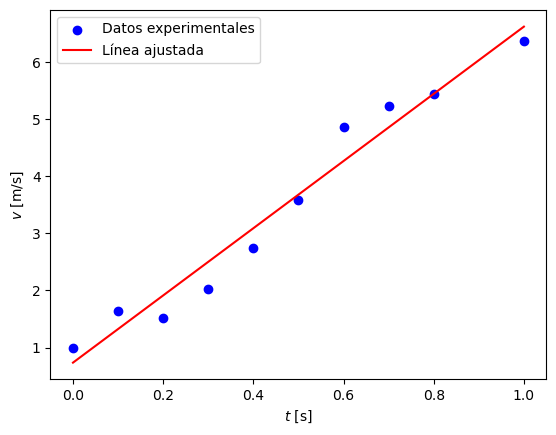

In [11]:
# Agregamos una constante (columna de unos) a xn
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.xlabel('$t$ [s]')
plt.ylabel('$v$ [m/s]')
plt.legend()
plt.show()

In [12]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     205.7
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.45e-07
Time:                        10:35:49   Log-Likelihood:                -3.7692
No. Observations:                  10   AIC:                             11.54
Df Residuals:                       8   BIC:                             12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7362      0.226      3.254      0.0

/Users/hector/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Ejemplo 2

In [13]:
# Datos de cizallamiento y edad de la pega
yn = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
               1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
               2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
               2053.50, 2414.40, 2200.50, 2654.20, 1753.70,2665.86])
xn = np.array([150.50, 230.75, 80.00, 170.00, 50.50, 190.00, 240.00, 20.50,
               70.50, 110.00, 130.00, 30.75, 250.00, 90.75, 220.00, 180.00,
               60.00, 120.50, 20.00, 210.50,0.00])

In [14]:
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7234 ± 0.2695
b = 2622.2834 ± 39.7582


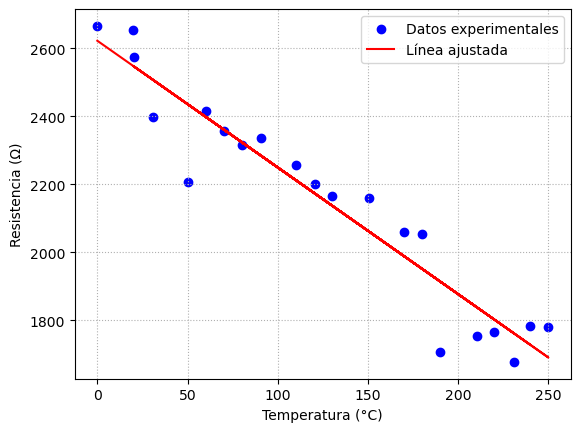

In [15]:
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia (Ω)')
plt.legend()
plt.show()

In [16]:
y_pred = m * xn + b
y_pred

array([2061.90678577, 1763.10128967, 2324.40881038, 1989.29984279,
       2434.25008309, 1914.83118333, 1728.65953467, 2545.95307228,
       2359.78142362, 2212.70582118, 2138.23716172, 2507.78788431,
       1691.42520494, 2284.38190591, 1803.12819413, 1952.06551306,
       2398.87746984, 2173.60977496, 2547.81478877, 1838.50080738,
       2622.28344823])

In [17]:
Sum_y = np.sum(yn)
Sum_y 

45293.009999999995

In [18]:
Sum_yp = np.sum(y_pred)
Sum_yp

45293.00999999999

In [19]:
e_i=yn-y_pred
e_i

array([  96.79321423,  -84.95128967,   -8.40881038,   72.00015721,
       -226.75008309, -206.53118333,   56.04046533,   29.04692772,
         -1.88142362,   43.99417882,   26.96283828, -108.23788431,
         88.37479506,   52.36809409,  -37.82819413,  101.43448694,
         15.52253016,   26.89022504,  106.38521123,  -84.80080738,
         43.57655177])

In [20]:
np.sum(e_i)

1.1823431123048067e-11

In [21]:
# Los promedios de x y y 
xp= np.sum(xn)/len(xn) 
yp= np.sum(yn)/len(xn)
print(xp,',', yp,',', m * xp + b)

125.01190476190476 , 2156.81 , 2156.8099999999995


In [22]:
Sx2 = np.sum((xn-xp)**2)/n
Sy2 = np.sum((yn-yp)**2)/n
Sxy=np.sum((xn-xp)*(yn-yp))/n
m=Sxy/Sx2 
b=yp-m*xp
Sx2 , Sy2, Sxy, m, b

(12896.068452380954,
 196582.60989999998,
 -48017.6465,
 -3.7234329731814255,
 2622.283448230692)

In [41]:
r=Sxy/(np.sqrt(Sx2)*np.sqrt(Sy2))
r, r**2

(-0.9536733725716963, 0.9094929015522734)

In [43]:
myx=r*np.sqrt(Sy2)/np.sqrt(Sx2)
mxy=r*np.sqrt(Sx2)/np.sqrt(Sy2)
myx,mxy

(-3.723432973181425, -0.24426192390276125)

In [25]:
np.sum(xn*e_i)

1.2842065189033747e-09

In [26]:
np.sum(y_pred*e_i)

2.6237103156745434e-08

In [27]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.31e-11
Time:                        10:35:50   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

In [28]:
SS_T=np.sum(yn**2)-len(xn)*yp**2
SS_T

1965826.098999992

In [29]:
SS_R= SS_T - m*np.sum(yn*(xn-xp))
SS_R

177921.2162732957

In [30]:
s=SS_R/(len(xn)-2)
s

9364.274540699773

In [31]:
np.sqrt(np.sum(e_i**2)/(len(xn)-2))

96.76918177136851

In [32]:
np.sqrt(s*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))

39.7582497768299

In [33]:
np.sqrt(s/(np.sum((xn-xp)**2)) )

0.269468747685758

In [34]:
xp**2

15627.976332199545

In [35]:
np.sum((xn-xp)**2)

128960.68452380954

In [36]:
from scipy import stats
# Sumas necesarias
n = len(xn)
sum_x = np.sum(xn)
sum_y = np.sum(yn)
sum_x2 = np.sum(xn**2)
sum_xy = np.sum(xn * yn)

# Calcular m y b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Predicciones
y_hat = m * xn + b

# Calcular SS_res y SS_tot
SS_res = np.sum((yn - y_hat)**2)
SS_tot = np.sum((yn - np.mean(yn))**2)

# Calcular R^2
R2 = 1 - (SS_res / SS_tot)

# Error estándar de los residuos
s = np.sqrt(SS_res / (n - 2))

# Varianza de los parámetros
sigma_m2 = np.sqrt(s**2 / np.sum((xn - np.mean(xn))**2))
sigma_b2 = np.sqrt(s**2 * (1/n + np.mean(xn)**2 / np.sum((xn - np.mean(xn))**2)))

# Estadísticos t
t_m = m / np.sqrt(sigma_m2)
t_b = b / np.sqrt(sigma_b2)

# Valores p
p_m = 2 * (1 - stats.t.cdf(np.abs(t_m), df=n-2))
p_b = 2 * (1 - stats.t.cdf(np.abs(t_b), df=n-2))

# Resultados
print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Coeficiente de determinación (R^2): {R2}")
print(f"Error estándar de los residuos: {s}")
print(f"Varianza de m: {sigma_m2}")
print(f"Varianza de b: {sigma_b2}")
print(f"t-m: {t_m}, p-m: {p_m}")
print(f"t-b: {t_b}, p-b: {p_b}")

Pendiente (m): -3.7234329731814206
Intercepto (b): 2622.2834482306916
Coeficiente de determinación (R^2): 0.9094929015522735
Error estándar de los residuos: 96.76918177136854
Varianza de m: 0.2694687476857636
Varianza de b: 39.75824977683073
t-m: -7.172810187325711, p-m: 8.148548074071726e-07
t-b: 415.87805561401336, p-b: 0.0


###  Ley de Enfriamiento de Newton. 

Pendiente: -3.7234329731814255
Intersección: 2622.283448230692
Coeficiente de determinación R^2: 0.9094929015522736
Valor p: 2.3115343196844765e-11
Error estándar: 0.2694687476857635


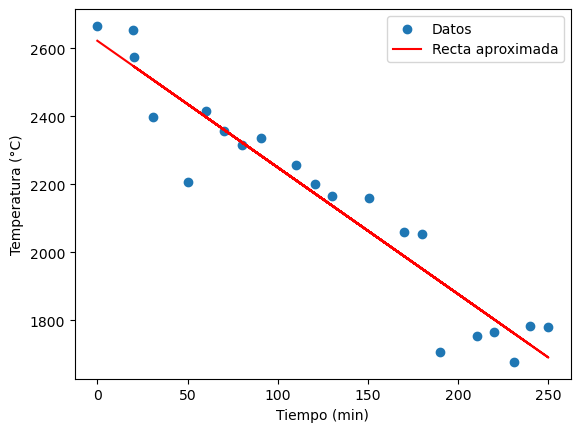

In [37]:
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Recta aproximada')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
#plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Pendiente: -3.7234329731814255
Intersección: 2622.283448230692
Coeficiente de determinación R^2: 0.9094929015522736
Valor p: 2.3115343196844765e-11
Error estándar: 0.2694687476857635


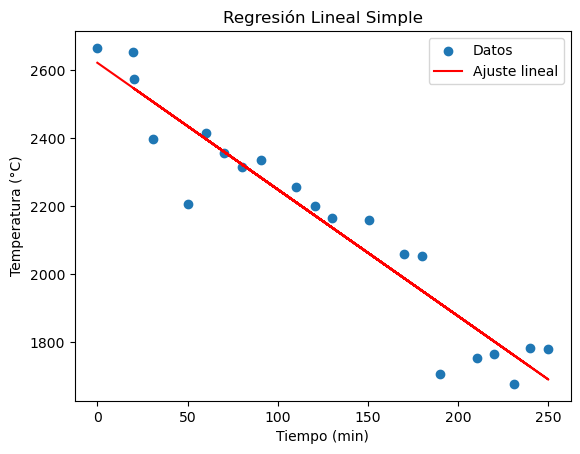

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Ajuste lineal')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Temperatura ambiente (T_env): -283601.24090048607
Temperatura inicial (T_0): 2622.526769023076
Constante (k): 1.3030309290741892e-05


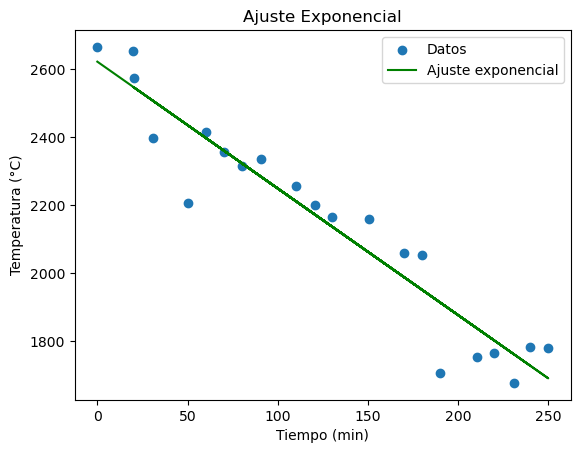

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
try:
    params, covariance = curve_fit(
        exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
    )
    T_env, T_0, k = params

    # Mostrar resultados
    print(f'Temperatura ambiente (T_env): {T_env}')
    print(f'Temperatura inicial (T_0): {T_0}')
    print(f'Constante (k): {k}')

    # Graficar resultados
    plt.scatter(xn, yn, label='Datos')
    plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Ajuste Exponencial')
    plt.legend()
    plt.show()
except RuntimeError as e:
    print(f"No se pudieron encontrar los parámetros óptimos: {e}")




Temperatura ambiente (T_env): -283601.24090048607
Temperatura inicial (T_0): 2622.526769023076
Constante (k): 1.3030309290741892e-05


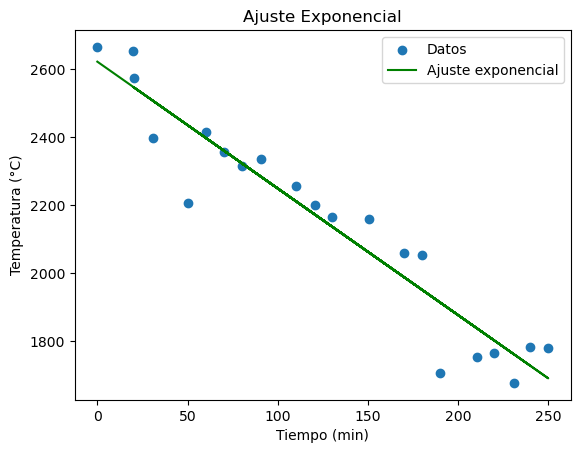

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos inventados

# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
params, covariance = curve_fit(
    exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
)
T_env, T_0, k = params

# Mostrar resultados
print(f'Temperatura ambiente (T_env): {T_env}')
print(f'Temperatura inicial (T_0): {T_0}')
print(f'Constante (k): {k}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial')
plt.legend()
plt.show()
